Original image shape: (316, 474)
Time taken for small image DFT: 1.108705997467041 seconds
Time taken for medium image DFT: 291.30872869491577 seconds
Time taken for small image FFT: 0.0073699951171875 seconds
Time taken for medium image FFT: 0.1467757225036621 seconds


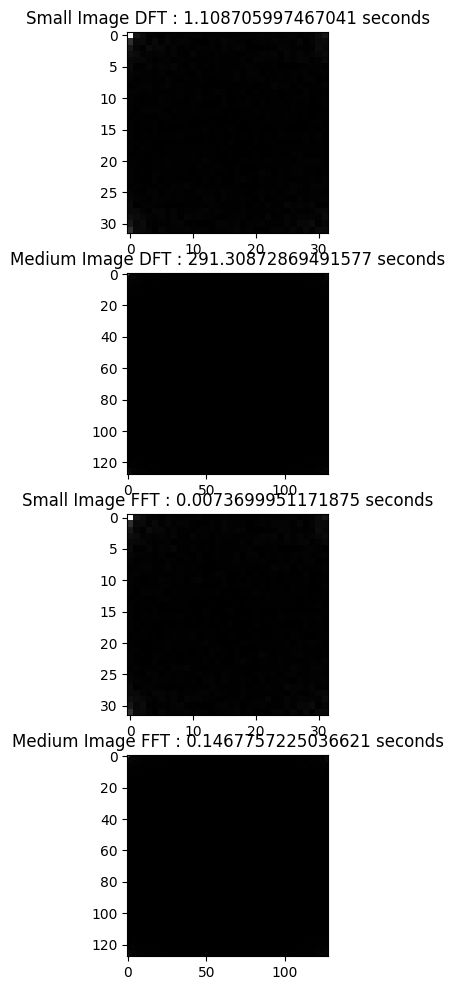

In [20]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
import numpy as np
import time

list_path = os.getcwd().split(os.sep)
list_path.pop()
list_path.pop()
list_path.append('images')
image_path = os.sep.join(list_path) + os.sep + 'tulip.jpeg'

img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)


if img is None:
    print("Error: Image not found.")
    exit(1)

print("Original image shape:", img.shape)
small_img = cv.resize(img,(32,32))
medium_img = cv.resize(img,(128,128))
large_img = cv.resize(img,(256,256))


def dft2d(image):
    start_time = time.time()
    
    M, N = image.shape
    F = np.zeros((M, N), dtype=complex)

    for u in range(M):
        for v in range(N):
            sum_val = 0.0 + 0.0j
            for x in range(M):
                for y in range(N):
                    angle = -2j * np.pi * ((u*x/M) + (v*y/N))
                    sum_val += image[x, y] * np.exp(angle)
            F[u, v] = sum_val

    end_time = time.time()
    return F, end_time - start_time




def fft1d(signal):
    N = len(signal)
    if N <= 1:
        return signal
    if N % 2 != 0:
        raise ValueError("Size must be power of 2")

    even = fft1d(signal[::2])
    odd = fft1d(signal[1::2])

    T = [np.exp(-2j*np.pi*k/N) * odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]


def fft2d(image):
    start_time = time.time()
    
    M, N = image.shape
    
    # FFT rows
    temp = np.array([fft1d(row) for row in image])
    
    # FFT columns
    temp = temp.T
    temp = np.array([fft1d(col) for col in temp])
    F = temp.T
    
    end_time = time.time()
    return F, end_time - start_time



small_img_dft = dft2d(small_img)
print("Time taken for small image DFT:", small_img_dft[1], "seconds")
medium_img_dft = dft2d(medium_img)
print("Time taken for medium image DFT:", medium_img_dft[1], "seconds")

small_img_fft = fft2d(small_img)
print("Time taken for small image FFT:", small_img_fft[1], "seconds")
medium_img_fft = fft2d(medium_img)
print("Time taken for medium image FFT:", medium_img_fft[1], "seconds")
# large_img_dft = dft2d(large_img)

plt.figure(figsize=(15,12))
plt.subplot(4, 1, 1)
plt.imshow(np.abs(small_img_dft[0]), cmap='gray')
plt.title("Small Image DFT : " + str(small_img_dft[1]) + " seconds")
plt.subplot(4, 1, 2)
plt.imshow(np.abs(medium_img_dft[0]), cmap='gray')
plt.title("Medium Image DFT : " + str(medium_img_dft[1]) + " seconds")
plt.subplot(4, 1, 3)
plt.imshow(np.abs(small_img_fft[0]), cmap='gray')
plt.title("Small Image FFT : " + str(small_img_fft[1]) + " seconds")
plt.subplot(4, 1, 4)
plt.imshow(np.abs(medium_img_fft[0]), cmap='gray')
plt.title("Medium Image FFT : " + str(medium_img_fft[1]) + " seconds")
plt.show()